In [ ]:
pip install folium

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 
import seaborn as sns

Récupération du dataframe

In [7]:
df = pd.read_csv('./resources/p2-arbres-fr.csv', delimiter=";")

# 01 General presentation of the dataset
## First previsualization of this data frame

In [8]:
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [9]:
df.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [10]:
df.columns.tolist()

['id',
 'type_emplacement',
 'domanialite',
 'arrondissement',
 'complement_addresse',
 'numero',
 'lieu',
 'id_emplacement',
 'libelle_francais',
 'genre',
 'espece',
 'variete',
 'circonference_cm',
 'hauteur_m',
 'stade_developpement',
 'remarquable',
 'geo_point_2d_a',
 'geo_point_2d_b']

In [11]:
df['id_emplacement'].count()

200137

We can say that this dataset has 200,137 trees. Let the city of Paris contain 200,137 trees in total

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

# Filtre 

Étude des valeurs manquantes


In [16]:
missing_values = df.isnull().sum()
print(missing_values)

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


Stratégie de remplacement / suppression des valeurs manquante

In [17]:
df = df[(df['libelle_francais'].isnull() != 1)]

Vérification après application de la stratégie

In [18]:
missing_values = df.isnull().sum()
print(missing_values)

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    168077
numero                 198640
lieu                        0
id_emplacement              0
libelle_francais            0
genre                       0
espece                   1387
variete                162575
circonference_cm            0
hauteur_m                   0
stade_developpement     66857
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


In [19]:
outliers = df[(df['hauteur_m'] > 115.55) | (df['circonference_cm'] > 3500)]
print("Valeurs aberrantes:")
outliers[['hauteur_m', 'circonference_cm']]

Valeurs aberrantes:


,hauteur_m,circonference_cm
5392,1510,100
6473,117,112
12536,255,47
15373,810,145
24099,125,130
...,...,...
187873,120,10
187874,120,10
189053,150,60
189441,157,8


# Filtre de valeurs abérantes

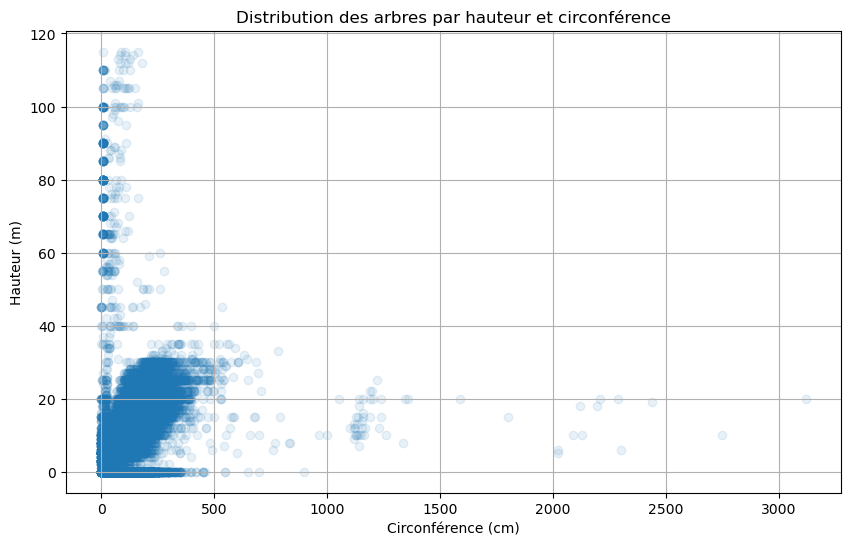

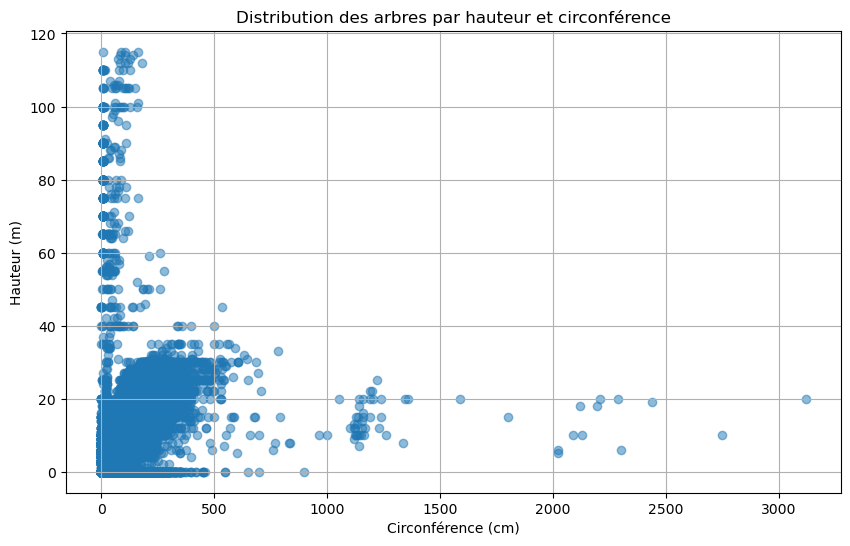

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['circonference_cm'], df['hauteur_m'], alpha=0.1)
plt.title('Distribution des arbres par hauteur et circonférence')
plt.xlabel('Circonférence (cm)')
plt.ylabel('Hauteur (m)')
plt.grid(True)
plt.show()

filtered_df = df[(df['hauteur_m'] <= 115.55) & (df['circonference_cm'] <= 3500)]

# Créer un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['circonference_cm'], filtered_df['hauteur_m'], alpha=0.5)
plt.title('Distribution des arbres par hauteur et circonférence')
plt.xlabel('Circonférence (cm)')
plt.ylabel('Hauteur (m)')
plt.grid(True)
plt.show()

df = filtered_df

Analyse par nom

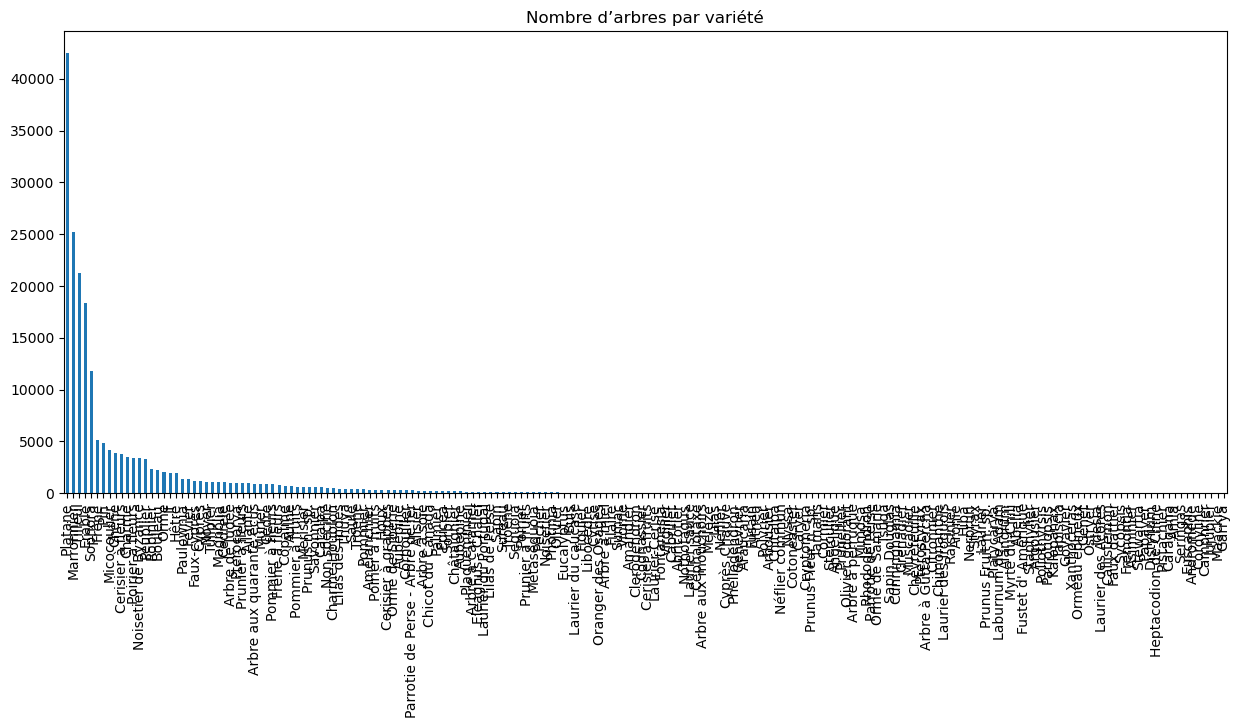

In [35]:
plt.figure(figsize=(15,6))
df['libelle_francais'].value_counts().plot(kind='bar')
plt.title('Nombre d’arbres par variété')
plt.show()

Hauteur par arrondissement

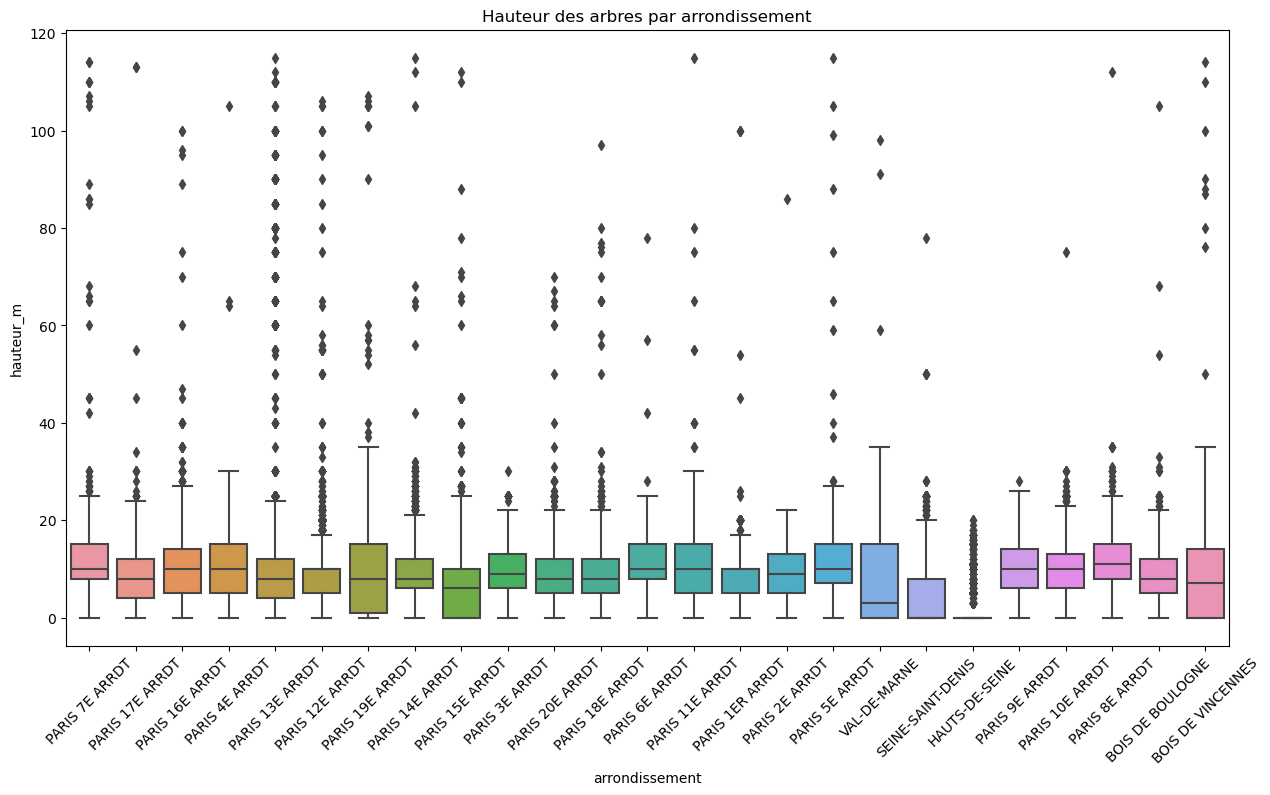

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='arrondissement', y='hauteur_m', data=df)
plt.xticks(rotation=45)
plt.title("Hauteur des arbres par arrondissement")
plt.show()

On peut remarqué que quelque commune on majoritairement des petits arbres (Par rapport à l'. En Seine-Saint-Denis les arbres sont les plus petit de Paris. Après suivent ceux du Val-de-Marne

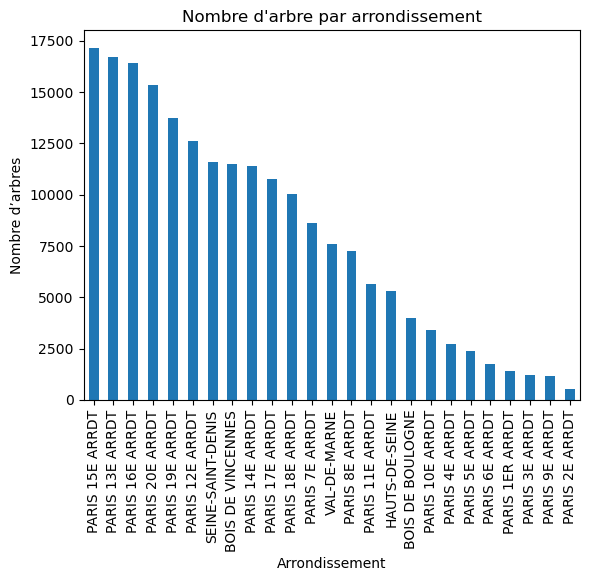

<Axes: >

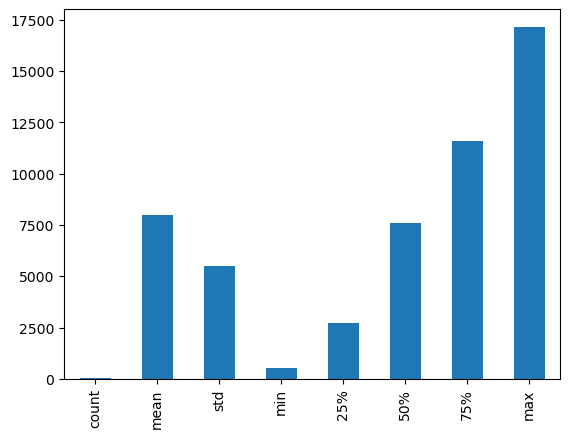

In [45]:
test = df['arrondissement'].value_counts().plot(kind='bar')
plt.title("Nombre d'arbre par arrondissement")
plt.ylabel('Nombre d’arbres')
plt.xlabel('Arrondissement')
plt.show()

test = df['arrondissement'].value_counts()

test.describe().plot(kind='bar')


Utilison folium pour afficher les arbres sur une carte



In [43]:
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

sample = df.sample(2000) # Réduit pour perf.
for idx, row in sample.iterrows():
    folium.Marker([row['geo_point_2d_a'], row['geo_point_2d_b']], tooltip=row['libelle_francais']).add_to(m)
display(m)
m.save('carte_arbres.html')


Arbres remarquable

In [45]:
m_remarquable = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

for idx, row in df[df['remarquable'] == 1].iterrows():
    folium.Marker([row['geo_point_2d_a'], row['geo_point_2d_b']], tooltip=row['libelle_francais'], icon=folium.Icon(color='red')).add_to(m_remarquable)
display(m)
m_remarquable.save('carte_arbres_remarquables.html')

Regoupement des arbres 

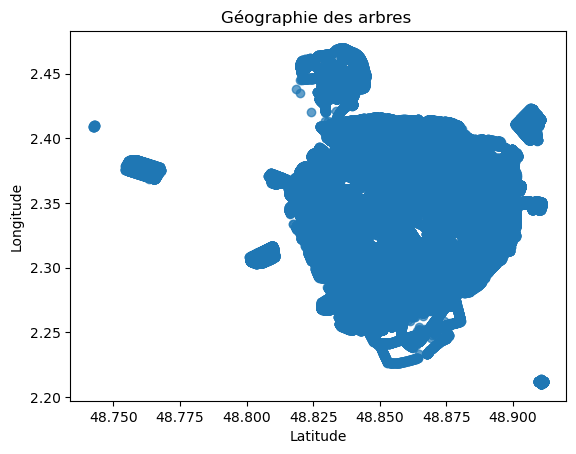

In [59]:
plt.scatter(df['geo_point_2d_a'], df['geo_point_2d_b'], alpha=0.7)
plt.title('Géographie des arbres ')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

On peut remarquer que quelques groupes d'abres sont excentrés de paris

In [44]:
df_remarquable = df[df['remarquable'] == 1]
print(f"Nombre total d'arbres remarquables : {len(df_remarquable)}")

Nombre total d'arbres remarquables : 182


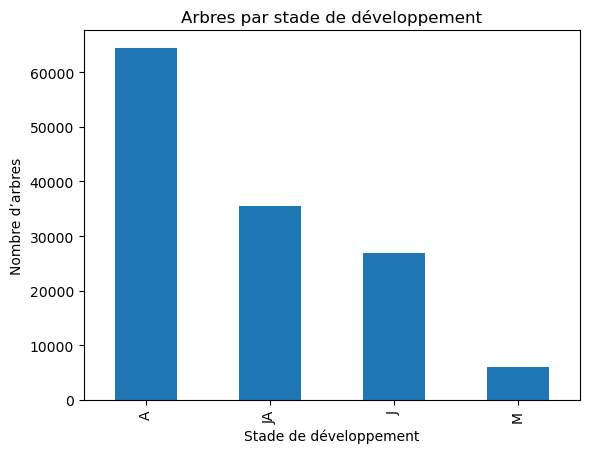

In [58]:
df['stade_developpement'].value_counts().plot(kind='bar')
plt.title('Arbres par stade de développement')
plt.ylabel('Nombre d’arbres')
plt.xlabel('Stade de développement')
plt.show()

On peut remarquer que ma majorité des arbre à Paris son en stade de développement Adulte (A)
